In [ ]:
import logging
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
import pykeen
from sklearn.decomposition import PCA

In [2]:
%matplotlib inline

In [3]:
logging.basicConfig(level=logging.INFO)
logging.getLogger('pykeen').setLevel(logging.INFO)

In [4]:
print(sys.version)

3.7.0 (default, Jul 23 2018, 20:22:55) 
[Clang 9.1.0 (clang-902.0.39.2)]


In [5]:
print(time.asctime())

Thu Nov 22 13:44:55 2018


In [6]:
print(pykeen.get_version())

0.0.14-dev


In [7]:
output_directory = os.path.join(
    os.path.expanduser('~'), 
    'Desktop', 
    'pykeen_test'
)

In [8]:
config = dict(
    # Use Signor (see: http://www.ndexbio.org/#/network/b0d987cb-1e6b-11e8-b939-0ac135e8bacf)
    training_set_path           = 'ndex:b0d987cb-1e6b-11e8-b939-0ac135e8bacf',
    random_seed                 = 0,
    hpo_mode                    = True,
    maximum_number_of_hpo_iters = 50,
    kg_embedding_model_name     = 'TransE',
    embedding_dim               = 10,
    normalization_of_entities   = 2,  # corresponds to L2
    scoring_function            = 1,  # corresponds to L1
    margin_loss                 = 8,
    learning_rate               = 0.01,
    num_epochs                  = 25,  # 1000 is better for real
    batch_size                  = 32,
)

results = pykeen.run(
    config=config,
    output_directory=output_directory,
)

INFO:pykeen.utilities.pipeline:downloading b0d987cb-1e6b-11e8-b939-0ac135e8bacf from ndex
/Users/cthoyt/.virtualenvs/hbp/lib/python3.7/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))
Training the model (epochs): 100%|██████████| 25/25 [00:14<00:00,  1.75it/s]


In [9]:
results.results.keys()

odict_keys(['trained_model', 'losses', 'entity_to_embedding', 'relation_to_embedding', 'eval_summary', 'entity_to_id', 'relation_to_id'])

In [10]:
results.results['trained_model']

TransE(
  (entity_embeddings): Embedding(4961, 10)
  (relation_embeddings): Embedding(12, 10)
  (criterion): MarginRankingLoss()
)

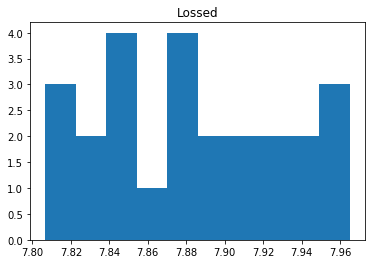

In [11]:
plt.title('Lossed')
plt.hist(results.results['losses'])
plt.show()

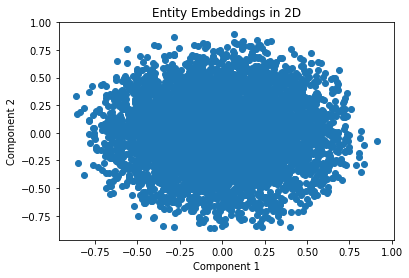

In [12]:
pca = PCA(n_components=2)
X = np.array(list(results.results['entity_to_embedding'].values()))
X_red = pca.fit_transform(X)

plt.title('Entity Embeddings in 2D')
plt.scatter(X_red[::,0], X_red[::,1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

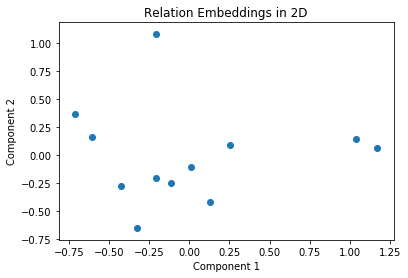

In [13]:
pca = PCA(n_components=2)
X = np.array(list(results.results['relation_to_embedding'].values()))
X_red = pca.fit_transform(X)

plt.title('Relation Embeddings in 2D')
plt.scatter(X_red[::,0], X_red[::,1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()